In [70]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
import random

N   = 100
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

In [72]:
W0 = np.ndarray([len(x),6])
W0[:,0]=x
W0[:,1]=y
W0[:,2]=z
W0[:,3]=vx
W0[:,4]=vy
W0[:,5]=vz
# print W

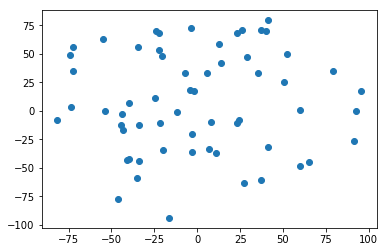

In [73]:
plt.plot(W0[:,0],W0[:,1],'o')

In [74]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)
# m[0] = 1e20

60


In [75]:
#calculamos la aceleracion

from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,len(m))

# d = np.ndarray([np.size(a),3])
# d[:,0] = u_str
# d[:,1] = u_gas
# d[:,2] = u_drk
# np.savetxt('energia_potencial0.dat', d, '%12.6f', '\t')

In [76]:
print ax, ay, az

[  -97.86331177   137.45069885  -104.76163483   149.98635864    10.38170433
   -10.76673889  -217.86264038    47.39385986    96.1809082     47.53461075
   -71.27928162    62.2489624   -110.80241394  -163.59233093   161.4683075
    68.33263397    60.10549927   255.66612244    25.79236984   -22.03627205
    61.01628494  -131.11283875  -122.48317719   -87.47767639   136.97195435
     9.83362865   -58.85723495   147.35089111    98.029953    -138.2507019
   -25.00582695    76.11375427  2221.32788086   -32.06279755    62.26238251
  -162.9360199    -51.66369629   -50.83893204  -131.87654114   -56.8154068
  -158.46218872   105.66060638  -169.82118225  -100.49794769    78.86193848
   224.8506012    140.21965027    55.80564117   142.02339172   143.4206543
   205.64413452   -42.74930954 -2622.29467773  -134.80361938   -37.98374557
    62.75854492    76.83179474    47.02809525   -45.14352036   -58.45240784] [   2.15116811 -140.03370667  -42.69347763 -168.3208313   157.6537323
  163.45896912  130.2

In [77]:
R0 = np.ndarray([len(m),6])
R0[:,0]=vx
R0[:,1]=vy
R0[:,2]=vz
R0[:,3]=ax
R0[:,4]=ay
R0[:,5]=az
# print R

In [78]:
h = 0.1
W = W0
R = R0
for k in range(0,200):
    for i in range(0,len(m)):
        W[i,:] = W[i,:] + h * R[i,:]
        R[:,0] = W[:,3]
        R[:,1] = W[:,4]
        R[:,2] = W[:,5]
        
        R[:,3], R[:,4], R[:,5] = aceleracion.a_str(m,W[:,0],W[:,1],W[:,2],len(m))

In [79]:
print W

[[ -2.77298800e+02   1.45056924e+03   1.88163554e+03  -1.12824430e+01
    8.00704804e+01   1.02642145e+02]
 [ -4.13325304e+03  -6.88199533e+03  -2.07785934e+03  -2.15491947e+02
   -3.59411370e+02  -1.07568637e+02]
 [ -3.31310811e+03  -1.32081459e+03   4.03243820e+03  -1.71951717e+02
   -6.85690585e+01   2.08834013e+02]
 [  3.83252283e+03  -3.05014550e+03   8.85821145e+02   2.01544851e+02
   -1.57188359e+02   4.63720190e+01]
 [  1.95226295e+03   6.48783740e+03   4.40520284e+02   1.02892083e+02
    3.39355531e+02   2.47838705e+01]
 [ -1.10567727e+04   3.37661709e+03   5.92376285e+03  -5.80325528e+02
    1.74899717e+02   3.09575660e+02]
 [ -8.97433794e+03   5.61664914e+03  -1.87882203e+03  -4.55783187e+02
    2.87602571e+02  -9.70936346e+01]
 [  4.04547222e+03   3.01641846e+03   4.46133323e+02   2.03303840e+02
    1.51772594e+02   2.28942287e+01]
 [  2.17756521e+03   1.63793767e+03   3.78548163e+03   1.13470232e+02
    9.28374539e+01   1.93588193e+02]
 [  2.20492886e+03  -3.55546260e+03  

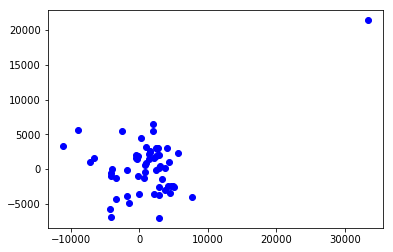

In [81]:
plt.plot(W[:,0],W[:,1],'o', color='b')
# plt.plot(W0[:,0],W0[:,1],'o', color='r')

In [82]:
W0

array([[ -2.77298800e+02,   1.45056924e+03,   1.88163554e+03,
         -1.12824430e+01,   8.00704804e+01,   1.02642145e+02],
       [ -4.13325304e+03,  -6.88199533e+03,  -2.07785934e+03,
         -2.15491947e+02,  -3.59411370e+02,  -1.07568637e+02],
       [ -3.31310811e+03,  -1.32081459e+03,   4.03243820e+03,
         -1.71951717e+02,  -6.85690585e+01,   2.08834013e+02],
       [  3.83252283e+03,  -3.05014550e+03,   8.85821145e+02,
          2.01544851e+02,  -1.57188359e+02,   4.63720190e+01],
       [  1.95226295e+03,   6.48783740e+03,   4.40520284e+02,
          1.02892083e+02,   3.39355531e+02,   2.47838705e+01],
       [ -1.10567727e+04,   3.37661709e+03,   5.92376285e+03,
         -5.80325528e+02,   1.74899717e+02,   3.09575660e+02],
       [ -8.97433794e+03,   5.61664914e+03,  -1.87882203e+03,
         -4.55783187e+02,   2.87602571e+02,  -9.70936346e+01],
       [  4.04547222e+03,   3.01641846e+03,   4.46133323e+02,
          2.03303840e+02,   1.51772594e+02,   2.28942287e+01],
